# PROJECT : CREATING MICROSOFT'S OWN MOVIE STUDIO

# Introduction
In a bold move to diversify its portfolio and expand into the dynamic world of entertainment, Microsoft intends to venture into the entertainment industry by establishing a new film production studio. The primary goal of this project is to gain a deep understanding of the film industry's current dynamics and translate this knowledge into actionable insights.

# Business Understanding
The move to join the movie industry reflects Microsoft's recognition of the transformative power of storytelling, the widespread appeal of cinematic content, and the immense financial potential that this industry offers.The movie industry involves producing a wide array of content, from blockbuster films to compelling documentaries and captivating series. Microsoft's venture into this domain aligns with its broader mission of enhancing the lives of individuals and organizations through innovation. By conducting a comprehensive analysis of this project, we aim to provide valuable insights into various aspects of the movie industry.Let's look at some of the objectives used:

# Objectives
We will be able to:

1. Analyze the overall box office performance of movies, including domestic,foreign gross and budget, to identify trends and patterns over the years.
2. Identify emerging genre trends by analyzing the popularity of genres over time.
3. Analyze movie details such as directors and box office performance.
4. Analyze relationship between reviews and ratings

# Data Understanding
In this project, we'll work with a bom.movie_gross.csv, rt.movie_info.tsv, tmdb.movies.csv, im.db database, rt.reviews.tsv and tn.movie_budgets.csv datasets.Because they were collected from various locations, the different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values) files that can be opened using spreadsheet software or pd.read_csv, while the data from IMDB is located in a SQLite database.

In data understanding we basically understand the columns of each of the data.This will be explained as we do our data cleaning before we begin with the analysis.

# Requirements
1. Load the Data with Pandas
In this analysis we have different files:'bom.movie_gross.csv', 'tn.movie_budgets.csv', 'tmdb.movies.csv',
'im.db', 'rt.movie_info.tsv', 'rt.reviews.tsv'. We will use different dataframes to represent the various files. Use pandas methods to inspect the shape and other attributes of these dataframes.
2. Perform Data Cleaning Required
In order to do analysis, we will need to:
    a. Identify and handle missing values
    b. Identify and handle text data requiring cleaning
3. Data Analysis
    Here we start the analysis according to our objectives
    Plot our data visualization

# 1.0 Load the data with pandas
In the cell below, we:
Import and alias pandas as pd
Import and alias numpy as np
Import sqlite3 for the sql database
Import and alias seaborn as sns
Import and alias matplotlib.pyplot as plt
Set Matplotlib visualizations to display inline in the notebook

In [117]:
# import relevant libraries required
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In the cell below we load bom.movie_gross.csv as bom_df and display the first 5 rows of the dataset:

In [118]:
# Load the dataset
bom_df= pd.read_csv('bom.movie_gross.csv')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


This step includes:
    a. Understanding the dimensionality of our dataset
    b. Investigating what type of data it contains, and the data types used to store it
    c. Discovering how missing values are encoded, and how many there are
    d. Getting a feel for what information it does and doesn't contain
In the cell below, inspect the overall shape of the dataframe(number of rows and columns):

In [119]:
# Number of rows and columns
bom_df.shape

(3387, 5)

Now let's look at the info printout:

In [120]:
# Check for data types
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The dataframe has 3387 rows and 5 columns. Three columns have data type object which can be string or categorical data(title,studio and foreign_gross), one column has data type float64(domestic_gross) and another column has data type int64(year). There are also missing values in 'studio', 'domestic_gross' and 'foreign_gross'.

Now let's check the number of entities or rows in each column:

In [121]:
#checking number of entities in each column
bom_df.count()

title             3387
studio            3382
domestic_gross    3359
foreign_gross     2037
year              3387
dtype: int64

In [122]:
# List of the columns
bom_df_columns = bom_df.columns.tolist()
bom_df_columns

['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

Checking the statistical measures of our dataframe using .describe() function in order to find the mean, median, mode and other measures related to the statistical observation:

In [123]:
#statistical measures
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Here we can look at the total number of missing values in the dataframe and find the null percentage:

In [124]:
# Checking for missing values
bom_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [125]:
# Calculate null percentage
null_count_bom_df = bom_df.isnull().sum()
total_count_bom_df = bom_df.shape[0]
null_percentage_bom_df = (null_count_bom_df / total_count_bom_df) * 100
null_percentage_bom_df

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

As we can see the percentage of missing values from 'foreign_gross' is a bit high unlike that of 'studio' and 'domestic_gross'. In this case since it is part of our analysis,we have to choose a method that will not interfere with our data. Imputation will be best for this, we will  impute missing values in the 'foreign_gross' column using the mean value of the available data.

Here is how to impute missing values and confirmation that there is no missing value in 'foreign_gross' column:

In [126]:
# Impute missing values in 'foreign_gross' with the mean value

# Replace "NaN" strings with actual NaN values in 'foreign_gross' column
bom_df['foreign_gross'].replace("NaN", np.nan, inplace=True)

# Convert 'foreign_gross' column to numeric (if it was not already)
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce')

# Impute missing values in 'foreign_gross' with the mean value
mean_foreign_gross = bom_df['foreign_gross'].mean()
bom_df['foreign_gross'].fillna(mean_foreign_gross, inplace=True)

# Check if missing values have been imputed
print(bom_df['foreign_gross'].isnull().sum())


0


Since the other two columns don't have large percentages for missing values. The best option for 'studio' and 'domestic_gross' columns will be to drop them because they will not significantly impact the analysis.

In the cell below, we drop rows with missing values in 'studio' and 'domestic_gross':

In [127]:
#drop rows with missing values for both 'studio' and 'domestic_gross'
bom_df.dropna(subset=['studio', 'domestic_gross'], inplace=True)
# Display the cleaned DataFrame
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
3,Inception,WB,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.505704e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,7.505704e+07,2018
3384,El Pacto,Sony,2500.0,7.505704e+07,2018
3385,The Swan,Synergetic,2400.0,7.505704e+07,2018


The DataFrame bom_df displayed at the end is the cleaned version with missing values in 'foreign_gross' imputed and rows with missing values in 'studio' and 'domestic_gross' removed.

We can go ahead and check for any duplicates and data inconsistency:

In [128]:
# Checking for any duplicates
bom_df.duplicated().sum()

0

In [129]:
# Check for data inconsistency
bom_df.describe()


,domestic_gross,foreign_gross,year
count,3.356000e+03,3.356000e+03,3356.000000
mean,2.877149e+07,7.560743e+07,2013.970203
std,6.700694e+07,1.068080e+08,2.479064
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,1.240000e+07,2012.000000
50%,1.400000e+06,7.505704e+07,2014.000000
75%,2.795000e+07,7.505704e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


Here we check the data types after succesfully converting foreign_gross column from object to float64:

In [130]:
# Check for the data types
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In the above cell,there is no missing values,data types  have been sorted and the data has been cleaned ready for analysis.

Let's find the yearly gross by summing up 'domestic_gross' and 'foreign_gross' using .groupby() function. Let the variable be yearly_gross:

In [131]:
# Group data by year and calculate total gross revenue for each year
yearly_gross = bom_df.groupby('year')[['domestic_gross', 'foreign_gross']].sum()
yearly_gross

,domestic_gross,foreign_gross
year,,
2010,1.015683e+10,1.542017e+10
2011,1.006409e+10,2.361891e+10
2012,1.087661e+10,2.826154e+10
2013,1.079233e+10,2.746351e+10
2014,1.033773e+10,2.866557e+10
2015,1.105141e+10,3.481930e+10
2016,1.125365e+10,3.707014e+10
2017,1.093327e+10,3.073715e+10
2018,1.109121e+10,2.768225e+10


To incorporate the 'tn.movie_budgets.csv' dataset into the analysis of the overall box office performance of movies, we have to follow these steps: 
1. Load the Additional Dataset 
2. Data Cleaning and Preparation 
3. Data Merge or Join 
4. Calculate Yearly Gross 
5. Data Grouping and Analysis 
6. Plot the Trends Now let's start with the first step:

In [132]:
# Load the 'tn.movie_budgets.csv' dataset
movie_budget_df = pd.read_csv('tn.movie_budgets.csv')
movie_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


We have to ensure that the 'release_date,' 'production_budget,' 'domestic_gross,' 'worldwide_gross,' and other relevant columns are properly formatted and have the correct data types.
First we have to load the first five rows:

In [133]:
# Load the first 5 entities
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [134]:
# Shape of the dataframe
movie_budget_df.shape

(5782, 6)

In [135]:
# Info to see the datatype and missing values
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In the above dataset,there is no missing values,but the data types of each column seem to have an issue. It is indicating that we have 5 columns with data type object which is either string or categorical data and 1 column with data type int64. The 'production_budget', 'domestic_gross', 'worldwide_gross' are stored as strings because the have symbols and commas. To perform numerical calculations and analysis, we should convert these columns to numeric data types (e.g., float) after removing the currency symbols and commas. Additionally, the 'release_date' column should be converted to a datetime data type for date-based analysis. 

Below is the conversion to correct the issue:

In [136]:
# Remove currency symbols ($) and commas from monetary columns and convert to float
monetary_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in monetary_columns:
    movie_budget_df[col] = movie_budget_df[col].str.replace('$', '').str.replace(',', '').astype(float)

# Convert 'release_date' to datetime
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'])

# Verify the data types and check the first few rows
print(movie_budget_df.dtypes)
print(movie_budget_df.head())


id                            int64
release_date         datetime64[ns]
movie                        object
production_budget           float64
domestic_gross              float64
worldwide_gross             float64
dtype: object
   id release_date                                        movie  \
0   1   2009-12-18                                       Avatar   
1   2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2   3   2019-06-07                                 Dark Phoenix   
3   4   2015-05-01                      Avengers: Age of Ultron   
4   5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08  
3        330600000.0     459005868.0     1.403014e+09  
4        317000000.0     620181382.0     1.316722e+09  


# 2.0 Data Analysis
Merge the two dataframes ('bom_df' and 'movie_budget_df') based on a common key, such as movie title, to combine the box office performance data with budget data.

In [137]:
# Merge the two datasets based on a common key (e.g., movie title)
merged_df1 = pd.merge(bom_df, movie_budget_df, left_on='title', right_on='movie', how='inner')
merged_df1

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010,47,2010-06-18,Toy Story 3,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,5.357000e+08,2010,38,2010-07-16,Inception,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010,27,2010-05-21,Shrek Forever After,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,3.980000e+08,2010,53,2010-06-30,The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,3.115000e+08,2010,15,2010-05-07,Iron Man 2,170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...,...,...,...,...,...
1239,Gotti,VE,4300000.0,7.505704e+07,2018,64,2018-06-15,Gotti,10000000.0,4286367.0,6.089100e+06
1240,Ben is Back,RAtt.,3700000.0,7.505704e+07,2018,95,2018-12-07,Ben is Back,13000000.0,3703182.0,9.633111e+06
1241,Bilal: A New Breed of Hero,VE,491000.0,1.700000e+06,2018,100,2018-02-02,Bilal: A New Breed of Hero,30000000.0,490973.0,6.485990e+05
1242,Mandy,RLJ,1200000.0,7.505704e+07,2018,71,2018-09-14,Mandy,6000000.0,1214525.0,1.427656e+06


After merging, you can calculate the yearly gross for each movie by summing the 'domestic_gross' and 'foreign_gross' columns from 'bom_df'.Then group the data by year and calculate the total yearly gross revenue and total production budget for each year.

In [138]:
# Calculate yearly gross by adding domestic gross and foreign gross
merged_df1['yearly_gross'] = merged_df1['domestic_gross_x'] + merged_df1['foreign_gross']
# Group by year and calculate total yearly gross revenue and toatl production budget
yearly_summary = merged_df1.groupby('year')[['yearly_gross', 'production_budget']].sum()

# 3.0 Data visualization

Here we plot the representation of our analysis in a more elaborate manner, in order to see trends between the yearly gross and the production budget after merging the two datasets

Below is the plot for our graph:

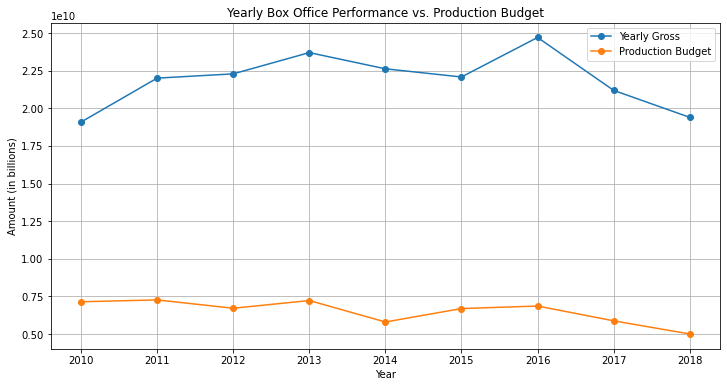

In [139]:
# Import libraries
import matplotlib.pyplot as plt
# Plot the trends in yearly gross and production budget 
plt.figure(figsize=(12, 6))
plt.plot(yearly_summary.index, yearly_summary['yearly_gross'], label='Yearly Gross', marker='o')
plt.plot(yearly_summary.index, yearly_summary['production_budget'], label='Production Budget', marker='o')
# Plot the title and labels
plt.title('Yearly Box Office Performance vs. Production Budget')
plt.xlabel('Year')
plt.ylabel('Amount (in billions)')
plt.legend()
plt.grid(True)
# Plot graph
plt.show()


# 1.1 Load and Prepare the Dataset:
To identify emerging genre trends by analyzing the popularity of genres over time using data from the 'tmdb.movies.csv' dataset, you can follow these steps: 

Load the 'tmdb.movies.csv' dataset. Extract the relevant columns, such as 'release_date' and 'genres'.

In [140]:
tmdb_df = pd.read_csv('tmdb.movies.csv', index_col=0)
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [141]:
# Shape of dataframe
tmdb_df.shape

(26517, 9)

In [142]:
# Display basic information about the dataset
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


There is no missing values here, the data type that needs to be be fixed is the release date to datetime format then extract release_year from the release_date:

In [143]:
# Correct Data Types
# Convert 'release_date' to datetime format
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], errors='coerce')

In [144]:
# Extract the release year from 'release_date'
tmdb_df['release_year'] = tmdb_df['release_date'].dt.year
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


Let us first read 'rt.movie_info.tsv' and show the first few rows.Since it is a tsv file we have to use delimiter '\t' to read it using pd.read_csv:

In [145]:
#use delimiter or sep parameter to '\t' to specify that the file uses tabs as column separators
movie_info_df = pd.read_csv('rt.movie_info.tsv', delimiter='\t')
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [146]:
# Check the shape of the data
movie_info_df.shape

(1560, 12)

In [147]:
# Display basic information about the dataset
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [148]:
# Convert the "box_office" column to numeric
movie_info_df['box_office'] = pd.to_numeric(movie_info_df['box_office'], errors='coerce')

In [149]:
#checking number of entities in each column
movie_info_df.count()

id              1560
synopsis        1498
rating          1557
genre           1552
director        1361
writer          1111
theater_date    1201
dvd_date        1201
currency         340
box_office         1
runtime         1530
studio           494
dtype: int64

In [150]:
#missing values
movie_info_df.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1559
runtime           30
studio          1066
dtype: int64

In [151]:
# Check the statistical measures
movie_info_df.describe()

,id,box_office
count,1560.000000,1.0
mean,1007.303846,363.0
std,579.164527,NaN
min,1.000000,363.0
25%,504.750000,363.0
50%,1007.500000,363.0
75%,1503.250000,363.0
max,2000.000000,363.0


In [152]:
#impute currency and box_office
# Impute missing 'currency' values with the mode
mode_currency = movie_info_df['currency'].mode().iloc[0]
movie_info_df['currency'].fillna(mode_currency, inplace=True)

# Replace NaN values in the 'studio' column with "unknown"
movie_info_df['studio'].fillna('unknown', inplace=True)

# Impute missing 'box_office' values with the mean (or median)
mean_box_office = movie_info_df['box_office'].mean()
movie_info_df['box_office'].fillna(mean_box_office, inplace=True)

# Check if missing values have been filled
missing_values = movie_info_df.isnull().sum()
print("Missing values after imputation:")
print(missing_values)

Missing values after imputation:
id                0
synopsis         62
rating            3
genre             8
director        199
writer          449
theater_date    359
dvd_date        359
currency          0
box_office        0
runtime          30
studio            0
dtype: int64


You can drop the rows with missing values in the "director", "writer", "theater_date", "dvd_date", "runtime","studio" and "synopsis" columns using the dropna() method in pandas:

In [153]:
# Drop the rows with missing values of director, writer,theater date, dvd_date and studio
columns_to_drop_na = ['director', 'writer', 'theater_date', 'dvd_date', 'runtime','synopsis']
movie_info_df.dropna(subset=columns_to_drop_na, inplace=True)

# Check if missing values have been dropped
missing_values = movie_info_df.isnull().sum()
print("Missing values after dropping rows:")
print(missing_values)

Missing values after dropping rows:
id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64


In [154]:
# Checking the data types
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            881 non-null    int64  
 1   synopsis      881 non-null    object 
 2   rating        881 non-null    object 
 3   genre         881 non-null    object 
 4   director      881 non-null    object 
 5   writer        881 non-null    object 
 6   theater_date  881 non-null    object 
 7   dvd_date      881 non-null    object 
 8   currency      881 non-null    object 
 9   box_office    881 non-null    float64
 10  runtime       881 non-null    object 
 11  studio        881 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 89.5+ KB


# 2.1 Data Analysis
After the data cleaning is done and dusted with, we can now move into the analysis for identifying genre trends over time by looking at the popularity of genres.

We can merge the two datasets 'tmdb_df' and 'movie_info_df'

In [155]:
merged_df2 = pd.merge(movie_info_df, tmdb_df, on='id', how='inner')
merged_df2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,studio,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,93,"""Garbo Laughs",R,Classics|Comedy|Drama|Romance,Ernst Lubitsch,Charles Brackett|Billy Wilder|Walter Reisch|Me...,"Nov 3, 1939","Sep 5, 2005",$,363.0,...,unknown,"[80, 18, 9648, 53]",en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,1959
1,95,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",$,363.0,...,Open Road Films,"[28, 53, 878, 12]",en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,1998
2,189,Based on one of Shirley Jackson's spookier sto...,NR,Drama|Horror|Mystery and Suspense|Television,Daniel Sackheim,Anthony Spinner,"Sep 29, 1996","Feb 4, 2003",$,363.0,...,unknown,"[80, 53]",en,Sin City: A Dame to Kill For,20.896,2014-08-22,Sin City: A Dame to Kill For,6.3,2210,2014
3,311,"In Fiorile (US title: Wild Flower), Italy's Ta...",PG-13,Art House and International|Drama,Paolo Taviani|Vittorio Taviani,Paolo Taviani|Vittorio Taviani|Sandro Petraglia,"Jan 1, 1993","Apr 1, 2008",$,363.0,...,unknown,"[18, 80]",en,Once Upon a Time in America,17.717,1984-06-01,Once Upon a Time in America,8.4,2243,1984
4,387,"In this western, Will Penny is an aging and im...",NR,Action and Adventure|Classics|Western|Romance,Tom Gries,Tom Gries,"Apr 10, 1968","Jun 4, 2002",$,363.0,...,unknown,"[18, 36, 10752]",de,Das Boot,16.554,1982-02-10,Das Boot,8.1,981,1982


After merging the two dataframes,we can start analysis by doing the following:

    Expand the genres in the merged dataset so that each row represents a single genre-movie combination (explode the 'genres' column). 
    Group the data by release year and genre to calculate the count of movies in each genre for each year. 
    Visualize the genre trends over time using bar graph or other suitable visualizations.

In [156]:
# Explode the 'genres' column to have one row per genre per movie
genre_expanded_df = merged_df2.explode('genre')
# Group by release year and genre, then count the number of movies
genre_trend = genre_expanded_df.groupby(['release_year', 'genre']).size().reset_index(name='movie_count')
genre_trend

,release_year,genre,movie_count
0,1946,Comedy|Drama|Romance,1
1,1956,Art House and International|Comedy|Drama|Roman...,1
2,1959,Classics|Comedy|Drama|Romance,1
3,1967,Drama,2
4,1977,Classics|Drama|Mystery and Suspense,1
5,1982,Action and Adventure|Classics|Western|Romance,2
6,1984,Art House and International|Drama,1
7,1996,Action and Adventure|Science Fiction and Fantasy,1
8,1997,Comedy,1
9,1997,Drama|Horror|Science Fiction and Fantasy,1


# 3.1 Data Visualization
Here we do data visualization for better understanding of the analysis

Let's visualize the data using a bar graph:

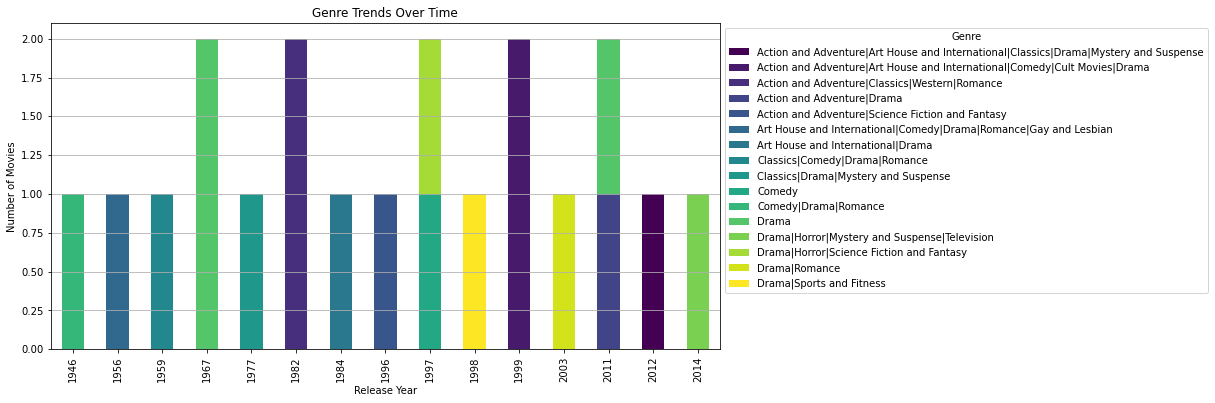

In [157]:
# Pivot the data to create a DataFrame suitable for a bar graph
genre_trend_pivot = genre_trend.pivot(index='release_year', columns='genre', values='movie_count').fillna(0)

# Plot genre trends over time using a bar graph
plt.figure(figsize=(12, 6))
genre_trend_pivot.plot(kind='bar', stacked=True, cmap='viridis', ax=plt.gca())

plt.title('Genre Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()


Interpretation:

    a. The stacked bars provide a visual representation of how the composition of movies by genre has changed over time.

    b. In earlier years (e.g., 1950s and 1960s), you can see a dominance of genres like "Drama" and "Classics."

    c. As you move into the 1980s and 1990s, there's a noticeable increase in the diversity of genres, with the emergence of genres like "Action and Adventure," "Science Fiction and Fantasy," and "Comedy."

    d. The 2000s show a continued increase in genre diversity, reflecting the expanding and evolving film industry.

    e. You can observe fluctuations in genre composition from year to year, indicating shifts in audience preferences or industry trends.

    f. For some years, certain genres stand out as dominant, while in other years, genres are more evenly distributed.

    g. The stacked bars also help identify periods when specific genres gained or lost popularity. For instance, you can see a spike in "Action and Adventure" movies in the mid-1980s.

    h. Towards the most recent years in the dataset, there's a wide variety of genres, reflecting the contemporary film landscape.

Overall, this visualization provides valuable insights into the dynamic nature of genre trends in the film industry over the years. It highlights how different genres have risen and fallen in popularity, and how the film landscape has evolved to encompass a wide range of genres to cater to diverse audience preferences.

# 1.2 Load data and prepare dataset 
Here we analyze movie details such as director and box office performance using 'rt.movie_info.tsv' dataset. We have already cleaned our data so we can begin the analysis:

    Director Analysis- Here we look at the relationship between director and number of movies.Directors who have led to the success of movie industry.
    Box Office Performance Analysis-Analyze the overall box office performance of the movies.
     *Calculate summary statistics for box office earnings. 
     *Visualize the distribution of box office earnings, e.g., with a histogram or bargraph. 
'rt.movie_info.tsv' is cleaned above we can just show the first few rows, shape, data types and statistical measures:

In [158]:
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",$,363.0,104 minutes,unknown
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,363.0,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",$,363.0,116 minutes,unknown
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",$,363.0,128 minutes,unknown
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",$,363.0,95 minutes,Warner Bros. Pictures


In [159]:
# Check the shape of the data
movie_info_df.shape

(881, 12)

In [160]:
# Display basic information about the dataset
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            881 non-null    int64  
 1   synopsis      881 non-null    object 
 2   rating        881 non-null    object 
 3   genre         881 non-null    object 
 4   director      881 non-null    object 
 5   writer        881 non-null    object 
 6   theater_date  881 non-null    object 
 7   dvd_date      881 non-null    object 
 8   currency      881 non-null    object 
 9   box_office    881 non-null    float64
 10  runtime       881 non-null    object 
 11  studio        881 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 89.5+ KB


In [161]:
# Check the statistical measures
movie_info_df.describe()

,id,box_office
count,881.000000,881.0
mean,1005.664018,363.0
std,576.094502,0.0
min,1.000000,363.0
25%,507.000000,363.0
50%,1000.000000,363.0
75%,1508.000000,363.0
max,1999.000000,363.0


# 2.2 Data Analysis
Here we begin the analysis for movie details such as directors and box office performance.

Director Analysis: 
1. Analyze the movies directed by different directors. 
2. Calculate summary statistics for box office performance grouped by director. 
3. Identify directors associated with high box office earnings.

In [162]:
# Director analysis
director_counts = movie_info_df['director'].value_counts()
print("Movies directed by different directors:")
print(director_counts.head())

# Calculate summary statistics for box office performance by director
director_box_office_stats = movie_info_df.groupby('director')['box_office'].agg(['mean', 'median', 'count', 'sum', 'max', 'min'])
print("Summary statistics for box office performance by director:")
print(director_box_office_stats)

# Sort the directors by total box office earnings (highest to lowest)
director_summary = director_box_office_stats.sort_values(by='sum', ascending=False)

# Display the summary statistics
print(director_summary)

Movies directed by different directors:
Steven Spielberg    8
Clint Eastwood      7
Barry Levinson      4
William Friedkin    4
Woody Allen         4
Name: director, dtype: int64
Summary statistics for box office performance by director:
                               mean  median  count    sum    max    min
director                                                               
Abel Ferrara                  363.0   363.0      2  726.0  363.0  363.0
Adam Ravetch|Sarah Robertson  363.0   363.0      1  363.0  363.0  363.0
Adam Shankman                 363.0   363.0      1  363.0  363.0  363.0
Adam Silver|Ben Hayflick      363.0   363.0      1  363.0  363.0  363.0
Aditya Chopra                 363.0   363.0      1  363.0  363.0  363.0
...                             ...     ...    ...    ...    ...    ...
Yoav Shamir                   363.0   363.0      1  363.0  363.0  363.0
Yoji Yamada                   363.0   363.0      1  363.0  363.0  363.0
Youssef Delara                363.0   363.

Box Office Performance Analysis:

    *Analyze the overall box office performance of the movies.
    *Calculate summary statistics for box office earnings.
    *Visualize the distribution of box office earnings, e.g., with a histogram, bar graph

In [163]:
# Box office performance analysis
box_office_stats = movie_info_df['box_office'].agg(['mean', 'median','count', 'max', 'min'])
print("Summary statistics for box office earnings:")
print(box_office_stats)

Summary statistics for box office earnings:
mean      363.0
median    363.0
count     881.0
max       363.0
min       363.0
Name: box_office, dtype: float64


# 3.2 Data Visualization
Here we do data visualization for better understanding of the analysis

Let's visualize the directors analysis using a bar graph:

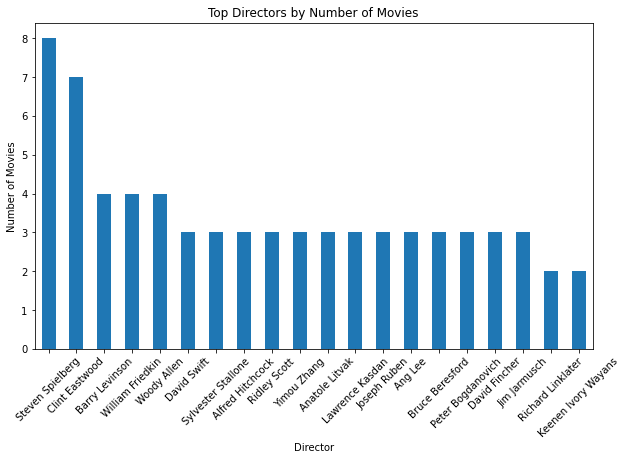

In [164]:
import matplotlib.pyplot as plt

# Create a bar plot for director counts
top_directors = director_counts.head(20)  # Adjust the number of directors to display
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar')
#plot title and labels
plt.title('Top Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


The above bar graph shows top directors by the number of movies they have directed.'Steven Spielberg' is the director with the highest number of movies. Majority of the directors have produced average of 3 movies.

Data visualization for box office performance analysis:

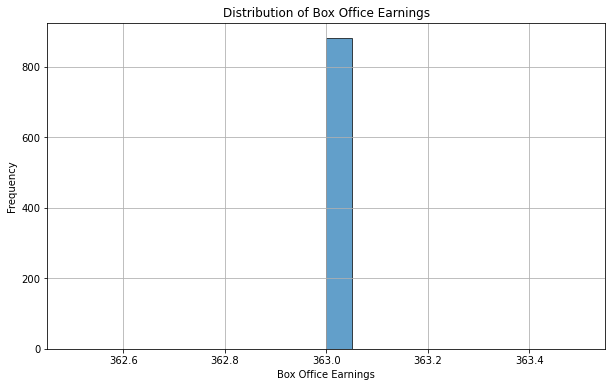

In [165]:
# Visualize the distribution of box office earnings using a histogram
plt.figure(figsize=(10, 6))
plt.hist(movie_info_df['box_office'], bins=20, edgecolor='k', alpha=0.7)
# Label title and labels 
plt.title('Distribution of Box Office Earnings')
plt.xlabel('Box Office Earnings')
plt.ylabel('Frequency')
plt.grid(True)
#plot graph
plt.show()

These statistics may raise questions about the accuracy or completeness of the box office earnings data, as it seems unusual for all movies in the dataset to have the exact same earnings figure.The dataset contains incomplete or placeholder values for box office earnings, which in this case there was a large number of box office missing. There may be some data-related issues that need further investigation on this so we would not consider this analysis for now.

# 1.3 Load and prepare the dataset
Here we will load the 'rt.reviews.tsv' dataset which is a tsv file, in order to analyze relationship between reviews and ratings.We will then clean the dataset.

The code below reads the TSV file, separates the values using tabs ('\t'), and stores the data in a pandas DataFrame called reviews_df:

In [166]:
#use delimiter or sep parameter to '\t' to specify that the file uses tabs as column separators
reviews_df = pd.read_csv('rt.reviews.tsv', delimiter='\t', encoding='latin')
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [167]:
reviews_df.shape

(54432, 8)

In [168]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [169]:
#Number of missing values
reviews_df.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [170]:
# Drop rows with missing 'review' and 'rating' values
reviews_df.dropna(subset=['review', 'rating', 'critic', 'publisher'], inplace=True)
# Verify that missing values have been dropped
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In [171]:
# Check for duplicates
reviews_df.duplicated().sum()

0

# 2.3 Data Analysis
Analyze relationship between reviews and ratings: Exploratory Data Analysis (EDA)

We start by exploring the data and visualizing the relationship between reviews and ratings. Scatter plots can be helpful for this purpose.

Analyzing Correlation:

*Calculate the correlation coefficient between ratings and reviews to quantify the strength and direction of the relationship.

In [172]:
# Convert the 'rating' column to numeric (assuming it contains numerical ratings)
reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce')

# Create bins for Review Length and Ratings
review_length_bins = [0, 100, 200, 300, 400, 500, float('inf')]  # Define your own bins
rating_bins = [0, 1, 2, 3, 4, 5]  # Define your own bins

# Apply binning to Review Length and Ratings
reviews_df['Review_Length_Group'] = pd.cut(reviews_df['review'].str.len(), bins=review_length_bins)
reviews_df['Ratings_Group'] = pd.cut(reviews_df['rating'], bins=rating_bins)

# Group data based on these bins
grouped_data = reviews_df.groupby(['Review_Length_Group', 'Ratings_Group']).size().reset_index(name='Count')

# Display the grouped data
print(grouped_data)

   Review_Length_Group Ratings_Group  Count
0         (0.0, 100.0]        (0, 1]     50
1         (0.0, 100.0]        (1, 2]      8
2         (0.0, 100.0]        (2, 3]     23
3         (0.0, 100.0]        (3, 4]     19
4         (0.0, 100.0]        (4, 5]     15
5       (100.0, 200.0]        (0, 1]     65
6       (100.0, 200.0]        (1, 2]      7
7       (100.0, 200.0]        (2, 3]     29
8       (100.0, 200.0]        (3, 4]     31
9       (100.0, 200.0]        (4, 5]     29
10      (200.0, 300.0]        (0, 1]      5
11      (200.0, 300.0]        (1, 2]      1
12      (200.0, 300.0]        (2, 3]      3
13      (200.0, 300.0]        (3, 4]      9
14      (200.0, 300.0]        (4, 5]      4
15      (300.0, 400.0]        (0, 1]      0
16      (300.0, 400.0]        (1, 2]      0
17      (300.0, 400.0]        (2, 3]      0
18      (300.0, 400.0]        (3, 4]      0
19      (300.0, 400.0]        (4, 5]      0
20      (400.0, 500.0]        (0, 1]      0
21      (400.0, 500.0]        (1

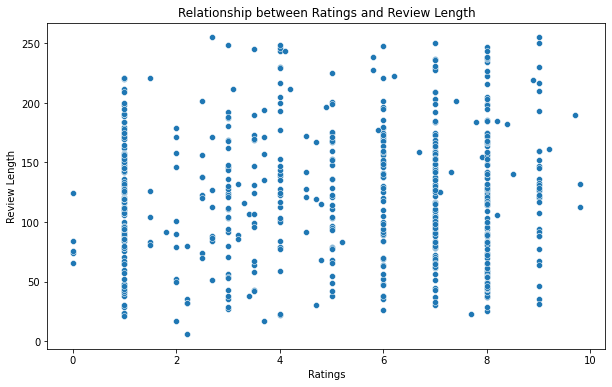

Correlation between Ratings and Review Length: 0.08875037651917239


In [173]:
# Convert 'rating' column to numeric (assuming it represents ratings)
reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce')

# Calculate the correlation between 'rating' and the length of 'review'
correlation = reviews_df['rating'].corr(reviews_df['review'].str.len())

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y=reviews_df['review'].str.len(), data=reviews_df)
plt.title('Relationship between Ratings and Review Length')
plt.xlabel('Ratings')
plt.ylabel('Review Length')
plt.show()

# Print the correlation coefficient
print(f"Correlation between Ratings and Review Length: {correlation}")

The correlation coefficient between Ratings and Review Length is approximately 0.0888, which is a relatively low positive correlation. Here's how to interpret this result:

1. Weak Positive Correlation: The positive sign of the correlation coefficient (0.0888) indicates that there is a positive relationship between Ratings and Review Length. When Ratings increase, Review Length tends to increase, but the relationship is not very strong.

2. Strength of Correlation: A correlation coefficient of 0.0888 is considered weak. This suggests that there is only a mild tendency for Review Length to increase as Ratings increase. In other words, the length of reviews does not strongly depend on the assigned ratings.

3. Practical Significance: While there is a statistically significant positive correlation, the low strength of the correlation suggests that Ratings may not be a strong predictor of Review Length. Other factors or variables may have a more substantial influence on how long reviews are.

# Recommendations
Based on our analysis, we can draw the following recommendations:
1. Diversify Genre Portfolio for Better Box Office Performance:
Based on our analysis of genre trends, consider diversifying the movie portfolio. Invest in genres that are currently on the rise to maximize box office potential.Keep an eye on emerging genres and be prepared to adapt your production strategy to meet changing audience preferences.
2. Director Selection and Performance:
Utilize insights from your analysis of director performance and box office results to make informed decisions when selecting directors for your projects.
Consider collaborating with directors who have a track record of delivering successful movies in genres that align with your objectives.
3. International Market Expansion:
Given that you're analyzing both domestic and foreign box office performance, consider strategies to tap into international markets. Identify genres and trends that resonate with global audiences.
Collaborate with international distribution partners and explore localization options to enhance your movie's appeal in different regions.
4. Quality Assurance and Improvement:
Place a strong emphasis on ensuring the quality of your movies. Positive reviews and high ratings are often correlated with well-made, engaging films.
Invest in scriptwriting, production, and post-production to create movies that captivate both critics and audiences

# Conclusion

In summary, our project provided a comprehensive overview of the movie industry, shedding light on critical factors influencing box office performance, genre trends, and the role of reviews and ratings. The recommendations offered are intended to guide industry professionals and stakeholders in making informed decisions to maximize the success of future movie projects. However, it's important to note that the movie industry is ever-evolving, and staying attuned to ongoing changes and innovations is essential for continued success in this dynamic field.